(ch_helmholtz)=
# Divergence and vorticity

**In this section:**
* Can divergence be inferred from looking at a plot of the vector field?
* How can a vortex have zero vorticity ?


## What is **flux**?

Consider a small (strictly infinitesimal) surface element $S$ within a field $\underline{F}$, such that the surface normal makes an angle $\theta$ to the direction of the field, as shown. The components of the field in directions parallel and perpendicular to the surface are illustrated in blue. The perpendicular component has magnitude $F\cos{\theta}$. The parallel component remains bounded by the surface.

<br>

```{image} navstok_img/flux1.png
---
name: flux1
alt: alternative description
align: center
scale: 80%
---
```
<br>

Multiplying the normal component of the field by the area of the surface element gives the volume indicated by the shaded cylinder in the image below. It is a scalar quantity, which tells us the instantaneous rate of flow through the surface per unit time. Mathematically, the flow rate across the surface $S$ is given by

\begin{equation}\underline{F}.\underline{S}=\underline{F}.\hat{\underline{n}}S = FS\cos{\theta},\end{equation}
where $\hat{\underline{n}}$ is the unit normal to the surface.

<br>

```{image} navstok_img/flux2.png
---
name: flux2
alt: alternative description
align: center
scale: 80%
---
```
<br>

The quantity $\underline{F}.\hat{\underline{n}}$ gives the flow rate *per unit area*, which is called the flux. Integrating the flux over a given finite surface area $A$ is equivalent to summing the individual surface element contributions to the flow rate, in the limit. The resulting flow rate $Q$ is given by

\begin{equation}Q=\int_A{\underline{F}.d\underline{\mathrm{S}}}\end{equation}

Most authors (including me!) use the terms flow rate and flux interchangeably, though flux is more pedantically defined as the flow rate per **unit** area. However, the intended meaning is almost always clear from the context and the surrounding text.

**Examples**

* Net volumetric flux is the rate of volume flow across a given area, $\displaystyle \int_A\underline{u}.d\underline{S}$

* Net mass flux is the rate of mass flow across a given area, $\displaystyle \int_A r\underline{u}.d\underline{S}$


```{admonition} Flux density
:class: theorem
Notice that the flux $\underline{F}.\hat{\underline{n}}$ is directly proportional to the field strength $F$. For this reason, the field strength is sometimes referred to as the *flux density*.

This description fits quite well with field line depictions, since the field strength can be inferred from how close together (dense) the field lines are. However, the term flux density is mainly reserved for the context of electricity and magnetism.
```

## What is **divergence**?
Suppose that a given point within  a field $\underline{F}=(f_x,f_y,f_z)$ is surrounded by a **closed** surface, $S$ as illustrated below:

```{image} navstok_img/source.png
---
name: source_fun
alt: alt text
align: center
scale: 80%
---
```

It can be shown (divergence theorem) that the flux $Q$ through surface $S$ is equivalent to a volume integral:
```{math}
:label: divergence_thm
Q=\oint_S \underline{F}.d\underline{S} \equiv \int_V (\nabla.\underline{F})dV,
````
where the *divergence* $\nabla.\underline{F}$ is given by:
\begin{equation}\nabla.\underline{F}=\biggr(\frac{\partial f_x}{\partial x},\frac{\partial f_y}{\partial y},\frac{\partial f_z}{\partial z}\biggr).\end{equation}

By applying the Fundamental Theorem of Calculus to {eq}`divergence_thm`, we obtain the result
\begin{equation}\nabla.\underline{F}=\frac{\mathrm{d}Q}{\mathrm{d}V}=\lim_{V\rightarrow 0} \frac{\oint_S \underline{F}.d\underline{S}}{V}\end{equation}

Hence, divergence can be understood as the flux per unit volume through an infinitesimally-small closed surface surrounding a point. A point with positive divergence behaves like a source, and a point with negative divergence behaves like a sink.

```{admonition} See also
:class: readmore
For further discussion of the divergence theorem and related concepts, visit
[Khan Academy](https://www.khanacademy.org/math/multivariable-calculus/greens-theorem-and-stokes-theorem/divergence-theorem-articles/a/3d-divergence-theorem)
```

```{exercise}
:label: ex-divergence
Calculate the divergence of the potential flow you looked at in {numref}`pot-fun`, and produce a grayscale plot of the divergence on the range $-2\leq x,y \leq 2.$
```

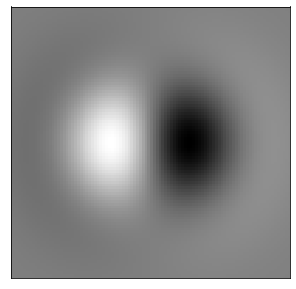

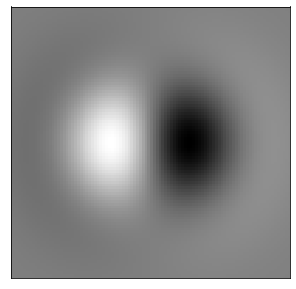

In [1]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
x=np.linspace(-2, 2, 100)
y=np.linspace(-2, 2, 100)

X,Y = np.meshgrid(x, y)
Z=4*X*(X**2+Y**2-2)*np.exp(-X**2-Y**2)

# options to prettify the plot
fig,ax=plt.subplots(figsize=(5,5))
ax.axis([-2,2,-2,2])
ax.xaxis.set_ticks([]), ax.yaxis.set_ticks([])

# The "pcolormesh" function can be used to make a density plot.
ax.pcolormesh(X,Y,Z,shading='auto',cmap=cm.gray)

glue("strfun_fig", fig, display=False)

````{toggle}

$\nabla.\underline{u}=\nabla^2\phi=\frac{\partial^2\phi}{\partial x^2}+\frac{\partial^2\phi}{\partial y^2}=4x(x^2+y^2-2)e^{-x^2-y^2}$

```{python}
x=np.linspace(-2, 2, 100)
y=np.linspace(-2, 2, 100)

X,Y = np.meshgrid(x, y)
Z=4*X*(X**2+Y**2-2)*np.exp(-X**2-Y**2)

# options to prettify the plot
fig,ax=plt.subplots(figsize=(5,5))
ax.axis([-2,2,-2,2])
ax.xaxis.set_ticks([]), ax.yaxis.set_ticks([])

# The "pcolormesh" function can be used to make a density plot.
ax.pcolormesh(X,Y,Z,shading='auto',cmap=cm.gray)
plt.show()
```

```{glue:} strfun_fig
```

````


## What is **vorticity**?
Vorticity is a measure of the local rotation or spin of fluid particles. It is defined as the curl of the velocity vector $(u,v,w)$:

\begin{equation}\underline{\omega} = \nabla\times\underline{u}=\left(\frac{\partial w}{\partial y}-\frac{\partial v}{\partial z}\right)\underline{e}_x,+\left(\frac{\partial u}{\partial z}-\frac{\partial w}{\partial x}\right)\underline{e}_y+\left(\frac{\partial v}{\partial x}-\frac{\partial u}{\partial y}\right)\underline{e}_z\end{equation}

An illustrated interpretation of vorticity is given below, looking only at the $z$-component for simplicity. Note that the subscript notation used on the diagram represents partial differentiation, not a vector component. We consider two fluid line elements $AB$ and $AC$, which are aligned with the $x$ and $y$ axes, respectively. By the definition of the partial derivative, we can write

\begin{equation}v(x+\delta x,y,z,t)-v(x,y,z,t)=\frac{\partial v}{\partial x}\delta x\end{equation}

so

* $\displaystyle \frac{\partial v}{\partial x}$ represents the instantaneous angular velocity of the fluid line element $AB$
* $\displaystyle\frac{\partial u}{\partial y}$ represents the instantaneous angular velocity of the fluid line element $AC$
* The local anticlockwise spin about $A$ is therefore given by $\displaystyle \frac{\partial v}{\partial x}-\frac{\partial u}{\partial y}$.

<br>

```{image} navstok_img/vorticity2.png
---
name: vorticity
alt: vorticity illustration
align: center
scale: 15%
---
```
<br>

It is important to recognise that the vorticity is not related to the global rotation of the fluid. To illustrate this, we will consider the vorticity of some basic flows, which are either rotating or not rotating.


**Example 1: Shear flow**

Consider a two-dimensional "shear" velocity profile described by $\underline{u}=(\sqrt{y},0,0).$

This flow is a rectilinear flow; meaning that it is not rotating as a whole, as can be seen from the image below. However, the vorticity is non-zero since fluid particles are rotated by the shearing force, as would be seen by an observer following the fluid.

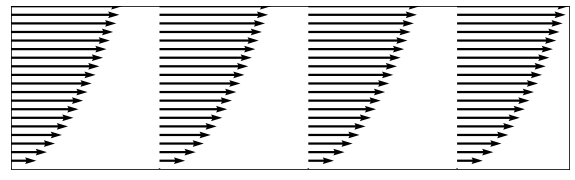

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0, 4, 4)
y=np.linspace(0, 1, 20)

X,Y = np.meshgrid(x, y)
(U,V)=(Y**(1/2),0)

fig,ax=plt.subplots(figsize=(10,3))
ax.axis([0,5,0,1])
ax.xaxis.set_ticks([]), ax.yaxis.set_ticks([])

ax.quiver(X,Y,U,V,scale=5,width=0.004)
plt.show()

The vorticity of this flow is given by

\begin{equation}\underline{\omega}=\begin{vmatrix}\underline{e}_x &\underline{e}_y &\underline{e}_z\\\frac{\partial}{\partial x}&\frac{\partial}{\partial y}&\frac{\partial}{\partial z}\\ \sqrt{y}& 0 & 0\end{vmatrix}=\left(0,0,-\frac{1}{2\sqrt{y}}\right)\end{equation}

We see that the fluid elements rotate about the $z$ axis. The negative sign indicates that the particles rotate in a clockwise direction, which agrees with intuition.



**Example 2: Line vortex ('potential vortex')**

Consider a flow described in cylindrical polars $(r,\theta,z)$, by the velocity profile $\underline{u}=\left(0,\frac{k}{r},0\right)$, where $k$ is a positive constant.

This flow is a swirling motion with velocity decreasing in the radial direction like $\frac{1}{r}$, as illustrated in the figure below for the case where $k=1$.

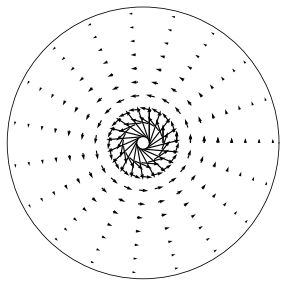

In [3]:
import matplotlib.pyplot as plt
import numpy as np

r = np.linspace(0.1,1,10)
t = np.linspace(0,2*np.pi,20)
T, R = np.meshgrid(t, r)

k=1
dr,dt = 0,k/R

U=dr * np.cos(T) - dt * np.sin(T)
V=dr * np.sin(T) + dt * np.cos(T)

f = plt.figure(figsize=(5,5))
ax = f.add_subplot(111, polar=True)
ax.xaxis.set_ticks([]), ax.yaxis.set_ticks([])

ax.quiver(T, R, U, V)
plt.show()

The vorticity is zero, meaning that fluid particles are swept round the origin without local rotation. To show this, we have to use the result for the gradient in cylindrical polars:

\begin{equation}\nabla\times \underline{u}=\frac{1}{r}\begin{vmatrix}\underline{e}_{r} & r\underline{e}_{\theta}& \underline{e}_z\\\frac{\partial }{\partial r}&\frac{\partial}{\partial \theta}&\frac{\partial}{\partial z}\\ u_{r}&r u_{\theta} & u_z\end{vmatrix}=\frac{1}{r}\begin{vmatrix}\underline{e}_{r} & r\underline{e}_{\theta}& \underline{e}_z\\\frac{\partial }{\partial r}&\frac{\partial}{\partial \theta}&\frac{\partial}{\partial z}\\ 0&k & 0\end{vmatrix}=\underline{0}\end{equation}

The surprising result occurs in this example because the slowing down of the fluid away from the origin is just the right strength to create a rotational shear that counterbalances the angular rotation of the fluid.



## Helmhotz decomposition

The Helmholtz decomposition theorem is also known as the **Fundamental Theorem of Vector Calculus**. It states that any vector field that is smooth, defined everywhere in space and vanishes at infinity together with its first derivatives can be decomposed as follows:

\begin{equation}\underline{F}=\nabla \phi +(\nabla \times \underline{A})\end{equation}

The first term is irrotational (curl-free) from the vector identity “curlgrad=$\underline{0}$”
The second term is solenoidal (divergence-free) from the vector identity “divcurl=0”.

We will not prove this result, but we will use it to simplify the equations of motion in some scenarios. The full version of Helmholtz' theorem also tells us how to calculate $\phi$ and $\underline{A}$, but we will not need those results.


```{exercise}
:label: ex-3d-straining
For the steady flow $\underline{u}=(2x,3y,-5z)$, determine the trajectories of particles starting on the ring defined by $x=\cos(\theta)$, $y=\sin(\theta)$, $z=1$.

Show that the flow is both irrotational and solenoidal, and describe the motion of the fluid particles in words.
```

````{toggle}

**Particle paths:**

$\frac{\mathrm{d}x}{\mathrm{d}t}=2x, \quad \frac{\mathrm{d}y}{\mathrm{d}t}=3y, \quad \frac{\mathrm{d}z}{\mathrm{d}t}=-5z$

Solution: $x=x_0e^{2t}, \quad y=y_0e^{3t}, \quad z=z_0e^{-5t}$.

Fluid particles that initially lie on the ring $x_0=\cos(\theta)$, $y_0=\sin(\theta)$, $z_0=1$ are described in parametric form by

$x=\cos(\theta)e^{2t}, \quad y=\sin(\theta)e^{3t}, \quad z=e^{-5t}$

The equations can also be written as

$\left(\frac{x}{e^{2t}}\right)^2+\left(\frac{y}{e^{3t}}\right)^2=1, \quad z=e^{-5t}.$

The equations describe an ellipse parallel to the $(x,y)$ plane at height $z=e^{-5t}$. The ellipse has major axis $e^{3t}$ parallel to $x$ and minor axis $e^{2t}$ parallel to $y$.

Particles that initially lie on the ring are therefore swept towards the $(x,y)$ plane and away from the $z$ axis. This type of motion is called a straining motion.

<br>

```{image} navstok_img/straining.png
---
name: uniform flow
alt: alternative description
align: center
scale: 80%
---
```
<br>

Irrotational: $\nabla\times\underline{u}=\begin{vmatrix}\underline{e}_x & \underline{e}_y & \underline{e}_z\\\frac{\partial}{\partial x} & \frac{\partial}{\partial y}& \frac{\partial}{\partial z}\\ 2x & 3y & -5z\end{vmatrix}=0\underline{e}_x+0\underline{e}_y+0\underline{e}_z$

Solenoidal: $\nabla.\underline{u} = \frac{\partial}{\partial x}\left(2x\right)+\frac{\partial}{\partial y}\left(3y\right)+\frac{\partial}{\partial z}\left(-5z\right)=0$

````

Note: A negative sign is often included in the gradient term by convention, so that work done against a force increases the potential, but mathematically we do not need the minus sign (since $\phi$ can be negative!)